# Music Genre Classification
It aims to categorize audio files into specific genres based on various features using classification algorithms and neural networks.

### Motivation
We have previously worked with numerical and image data in past projects. We didn’t want to do anything similar again.
Our main intention was to ofcourse get a good grade and also learn something new.
Hence, we decided to work with audio data. 
We believed it would help us gain a deeper understanding on how audio files are analyzed and how different it is than numerical and image data.

In [1]:
# importing all libraries and functions

import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef

#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import SGD
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping

In [ ]:
sklearn.__version__

'1.1.3'

In [ ]:
# Uninstalled scikit-learn to reisntall and ugrade to latest version
# We need to do this becasue the "log_loss" criterion of Random Forest has been added newly in the latest version. Pre-installed sklearn version on Colab is not the latest version as of now.

!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 72.2 MB/s 


In [ ]:
sklearn.__version__

'1.1.3'

In [2]:
#Analysing the Data in Pandas
data3 = pd.read_csv('https://raw.githubusercontent.com/purav-parekh/music-genre-classification/main/features_3_sec.csv')

# Dropping unneccesary columns
data = data3.drop(['filename'],axis=1)

#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [ ]:
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


# Data preprocessing

To get imporved results the data was first normalized using different techniques to see if there is any improvement/reduction in results. 
Four techniques were used for normalization:


1. Standardization
2. L1 Normalization
3. L2 Normalization
4. Min-Max Normalization

Once the data was normalized, it was split into two halves, test and train. Train contained 70% of the data while test contained 30% of the data. 



In [3]:
# Dataset without normalization
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], y, test_size=0.3)

In [4]:
#Scaling the Feature columns - StandardScaling
scaler = StandardScaler()
XStandard = scaler.fit_transform(data.iloc[:, :-1])

#Dividing data into training and Testing set
X_trainStandard, X_testStandard, y_trainStandard, y_testStandard = train_test_split(XStandard, y, test_size=0.3)

In [5]:
#Scaling the Feature columns - L1 Normalization
XL1 = sklearn.preprocessing.normalize(data.iloc[:, :-1], norm='l1', axis=0, copy=True)

#Dividing data into training and Testing set
X_trainL1, X_testL1, y_trainL1, y_testL1 = train_test_split(XL1, y, test_size=0.3)

In [6]:
#Scaling the Feature columns - L2 Normalization
XL2 = sklearn.preprocessing.normalize(data.iloc[:, :-1], norm='l2', axis=0, copy=True)

#Dividing data into training and Testing set
X_trainL2, X_testL2, y_trainL2, y_testL2 = train_test_split(XL2, y, test_size=0.3)

In [7]:
#Scaling the Feature columns - Max Normalization
XMax = sklearn.preprocessing.normalize(data.iloc[:, :-1], norm='max', axis=0, copy=True)

#Dividing data into training and Testing set
X_trainMax, X_testMax, y_trainMax, y_testMax = train_test_split(XMax, y, test_size=0.3)

# K Nearest Neighbors
KNN is a supervised classification algorithm. As the underlying idea of the project was to classify music based on genre, KNN - the simplest classification algorithm was first applied on the data.

**Note: As KNN is non-parametric, the initial idea of different techniques of normalization will come to handy here, as we will see further.**

Performance Metrics:
1. **Accuracy** - Fraction of predictions the model got right.
2. **Precision** - Fraction of positive predictions that were actually correct.
3. **Recall** - Fraction of actual positives that were correctly predicted.
4. **F1 Score** - Harmonic mean of precision and recall.
5. **Matthews Score** - The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

In [ ]:
# KNN Implementation
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
classifier3.fit(X_train, y_train) # non-standardized data
classifier3.fit(X_trainStandard, y_trainStandard) # standardized data
classifier3.fit(X_trainL1, y_trainL1) # L1 normalized data
classifier3.fit(X_trainL2, y_trainL2) # L2 normalized data
classifier3.fit(X_trainMax, y_trainMax) # Max normalized data

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier3.predict(X_test)
y_predStandard = classifier3.predict(X_testStandard)
y_predL1 = classifier3.predict(X_testL1)
y_predL2 = classifier3.predict(X_testL2)
y_predMax = classifier3.predict(X_testMax)

In [ ]:
print('Non-scaled Dataset Results:\n')
print(confusion_matrix(y_test, y_pred),'\n')
print ("Classification Report:\n\n",classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Matthews Score:", sklearn.metrics.matthews_corrcoef(y_test, y_pred))

Non-scaled Dataset Results:

[[  0 278   0   0   0   0   0   0   0   0]
 [  0 287   0   0   3   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 295   0   0   1   0   0   0   0   0]
 [  0 301   0   0   7   0   0   0   0   0]
 [  0 312   0   0   2   0   0   0   0   0]
 [  0 317   0   0   5   0   0   0   0   0]
 [  0 287   0   0  13   0   0   0   0   0]
 [  0 301   0   0   2   0   0   0   0   0]
 [  0 273   0   0   1   0   0   0   0   0]] 

Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       278
           1       0.10      0.99      0.18       290
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       296
           4       0.21      0.02      0.04       308
           5       0.00      0.00      0.00       314
           6       0.00      0.00      0.00       322
           7       0.00      0.00      0.00       300
           8       0.00   

In [ ]:
print('Standard Scaling Results:\n')
print(confusion_matrix(y_testStandard, y_predStandard),'\n')
print ("Classification Report:\n",classification_report(y_testStandard, y_predStandard))
print("Accuracy:",accuracy_score(y_testStandard,y_predStandard))
print("Matthews Score:", sklearn.metrics.matthews_corrcoef(y_testStandard, y_predStandard))

Standard Scaling Results:

[[215  15   6   2   1  13  36   3   2   2]
 [  0 298   0   0   0   8   0   2   0   0]
 [ 31  95  85   2   4  21  10  19   8  19]
 [  8  15   3  95  15  18  37  37  33  20]
 [  9  11   3   3 147   2  34  51  14   2]
 [  9 122   1   0   1 169   0   0   1   0]
 [  2   0   0   1   2   2 300   1   4   3]
 [  0  11   1   4  14   4   0 212  66   6]
 [ 25  36  10   7  20  13   0  20 160   4]
 [ 20  30   6  14   9  14  28  12  26 153]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       295
           1       0.47      0.97      0.63       308
           2       0.74      0.29      0.42       294
           3       0.74      0.34      0.46       281
           4       0.69      0.53      0.60       276
           5       0.64      0.56      0.60       303
           6       0.67      0.95      0.79       315
           7       0.59      0.67      0.63       318
           8       0.51      

In [ ]:
print('L1 Normalization Results:\n')
print(confusion_matrix(y_testL1, y_predL1),'\n')
print ("Classification Report:\n",classification_report(y_testL1, y_predL1))
print("Accuracy:",accuracy_score(y_testL1,y_predL1))
print("Matthews Score:", sklearn.metrics.matthews_corrcoef(y_testL1, y_predL1))

L1 Normalization Results:

[[  0 313   0   0   0   0   0   0   0   0]
 [  0 292   0   0   0   0   0   0   0   0]
 [  0 271   0   0   0   0   0   0   0   0]
 [  0 287   0   0   0   0   0   0   0   0]
 [  0 308   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0]
 [  0 295   0   0   0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0]
 [  0 322   0   0   0   0   0   0   0   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.10      1.00      0.18       292
           2       0.00      0.00      0.00       271
           3       0.00      0.00      0.00       287
           4       0.00      0.00      0.00       308
           5       0.00      0.00      0.00       301
           6       0.00      0.00      0.00       304
           7       0.00      0.00      0.00       295
           8       0.00      

In [ ]:
print('L2 Normalization Results:\n')
print(confusion_matrix(y_testL2, y_predL2),'\n')
print ("Classification Report:\n",classification_report(y_testL2, y_predL2))
print("Accuracy:",accuracy_score(y_testL2,y_predL2))
print("Matthews Score:", sklearn.metrics.matthews_corrcoef(y_testL2, y_predL2))

L2 Normalization Results:

[[  0 280   0   0   0   0   0   0   0   0]
 [  0 283   0   0   0   0   0   0   0   0]
 [  0 286   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 295   0   0   0   0   0   0   0   0]
 [  0 336   0   0   0   0   0   0   0   0]
 [  0 315   0   0   0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0]
 [  0 283   0   0   0   0   0   0   0   0]
 [  0 325   0   0   0   0   0   0   0   0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.09      1.00      0.17       283
           2       0.00      0.00      0.00       286
           3       0.00      0.00      0.00       290
           4       0.00      0.00      0.00       295
           5       0.00      0.00      0.00       336
           6       0.00      0.00      0.00       315
           7       0.00      0.00      0.00       304
           8       0.00      

In [ ]:
print('Max normalization Results:\n')
print(confusion_matrix(y_testMax, y_predMax))
print ("Classification Report:\n",classification_report(y_testMax, y_predMax))
print("Accuracy:",accuracy_score(y_testMax,y_predMax))
print("Matthews Score:", sklearn.metrics.matthews_corrcoef(y_testMax, y_predMax))

Max normalization Results:

[[280   0  10   1   0   4   1   0   1   2]
 [  2 281   0   0   0  12   0   0   0   1]
 [  8   3 264   3   1   4   0   0  12   4]
 [  1   2   6 305   2   1   1   0   1   7]
 [  3   2   3   9 288   0   0   6   3   1]
 [  5  14   4   2   0 228   0   0   0   1]
 [  2   0   1   2   0   0 300   0   1   3]
 [  0   1  10  15   6   2   0 257   3   4]
 [  0   1   5   3   1   1   0   0 276   2]
 [  5   3   8  21   2   3   4   2   7 257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       299
           1       0.92      0.95      0.93       296
           2       0.85      0.88      0.87       299
           3       0.84      0.94      0.89       326
           4       0.96      0.91      0.94       315
           5       0.89      0.90      0.90       254
           6       0.98      0.97      0.98       309
           7       0.97      0.86      0.91       298
           8       0.91      0

It can be observed that for k = 3, different accuracy values for differently "normalized" datasets were obtained.

To summarise:
1. Non-standardized Dataset - 10%
2. Standardized Dataset - 62%
3. L1 Normalized Dataset - 11%
4. L2 Normalized Dataset - 10%
5. **Max normalised Dataset - 91%**

It can be seen that the dataset with max normalization obtained the highest accuracy.

Next, the most optimal 'k' value is to be found out.





Maximum accuracy:- 0.3063063063063063 at K = 22


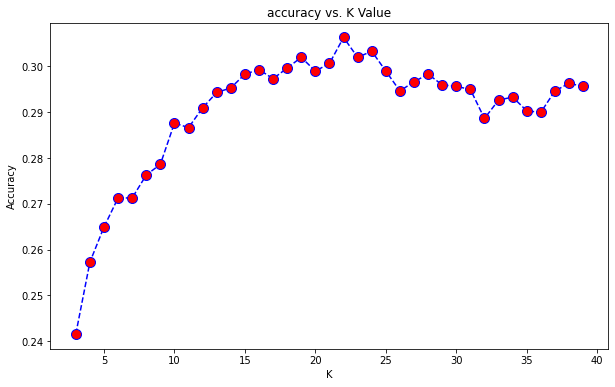

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(3,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(3,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+3)

Maximum accuracy:- 0.8742075408742075 at K = 3


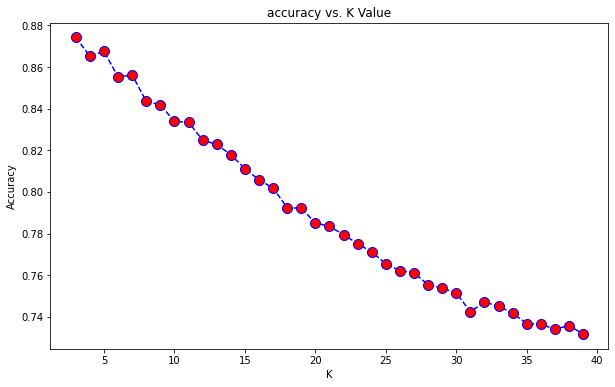

In [ ]:
accStandard = []
# Will take some time
from sklearn import metrics
for i in range(3,40):
    neighStandard = KNeighborsClassifier(n_neighbors = i).fit(X_trainStandard,y_trainStandard)
    yhatStandard = neighStandard.predict(X_testStandard)
    accStandard.append(metrics.accuracy_score(y_testStandard, yhatStandard))

plt.figure(figsize=(10,6))
plt.plot(range(3,40),accStandard,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accStandard),"at K =",accStandard.index(max(accStandard))+3)

Maximum accuracy:- 0.8988988988988988 at K = 3


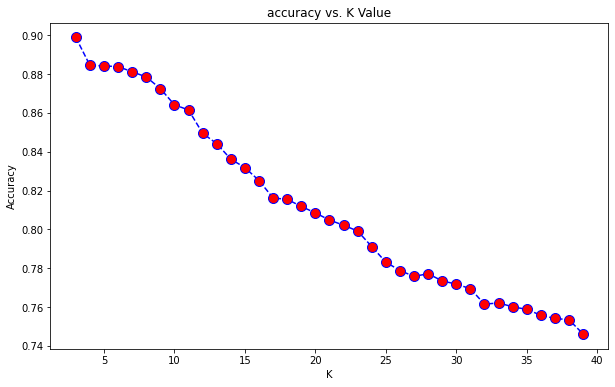

In [ ]:
accL1 = []
# Will take some time
from sklearn import metrics
for i in range(3,40):
    neighL1 = KNeighborsClassifier(n_neighbors = i).fit(X_trainL1,y_trainL1)
    yhatL1 = neighL1.predict(X_testL1)
    accL1.append(metrics.accuracy_score(y_testL1, yhatL1))

plt.figure(figsize=(10,6))
plt.plot(range(3,40),accL1,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accL1),"at K =",accL1.index(max(accL1))+3)

Maximum accuracy:- 0.9032365699032365 at K = 3


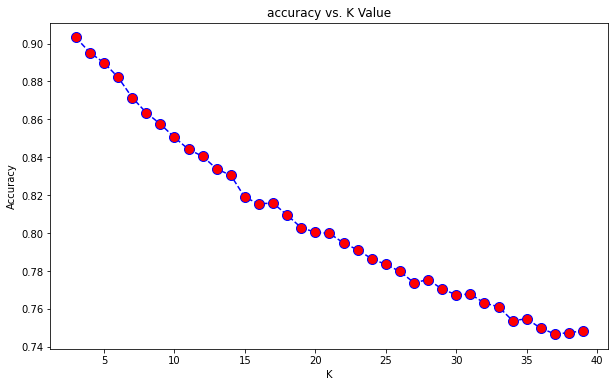

In [ ]:
accL2 = []
# Will take some time
from sklearn import metrics
for i in range(3,40):
    neighL2 = KNeighborsClassifier(n_neighbors = i).fit(X_trainL2,y_trainL2)
    yhatL2 = neighL2.predict(X_testL2)
    accL2.append(metrics.accuracy_score(y_testL2, yhatL2))

plt.figure(figsize=(10,6))
plt.plot(range(3,40),accL2,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accL2),"at K =",accL2.index(max(accL2))+3)

Maximum accuracy:- 0.9102435769102436 at K = 3


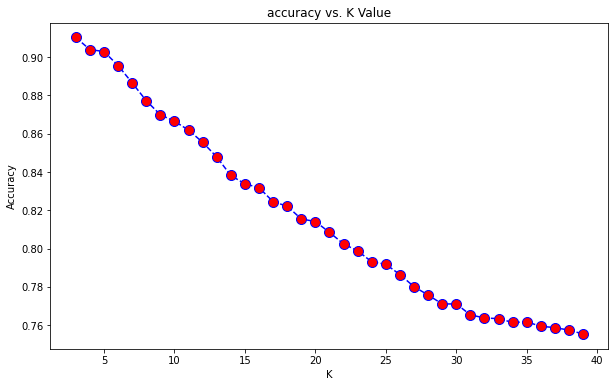

In [ ]:
accMax = []
# Will take some time
from sklearn import metrics
for i in range(3,40):
    neighMax = KNeighborsClassifier(n_neighbors = i).fit(X_trainMax,y_trainMax)
    yhatMax = neighMax.predict(X_testMax)
    accMax.append(metrics.accuracy_score(y_testMax, yhatMax))

plt.figure(figsize=(10,6))
plt.plot(range(3,40),accMax,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accMax),"at K =",accMax.index(max(accMax))+3)

Some promising results. 

* The maximum accuracy was obtained for the max dataset, consistent with the previous findings.
* The value of optimal 'k' was always 3, except for the non-standardized dataset where k=22.

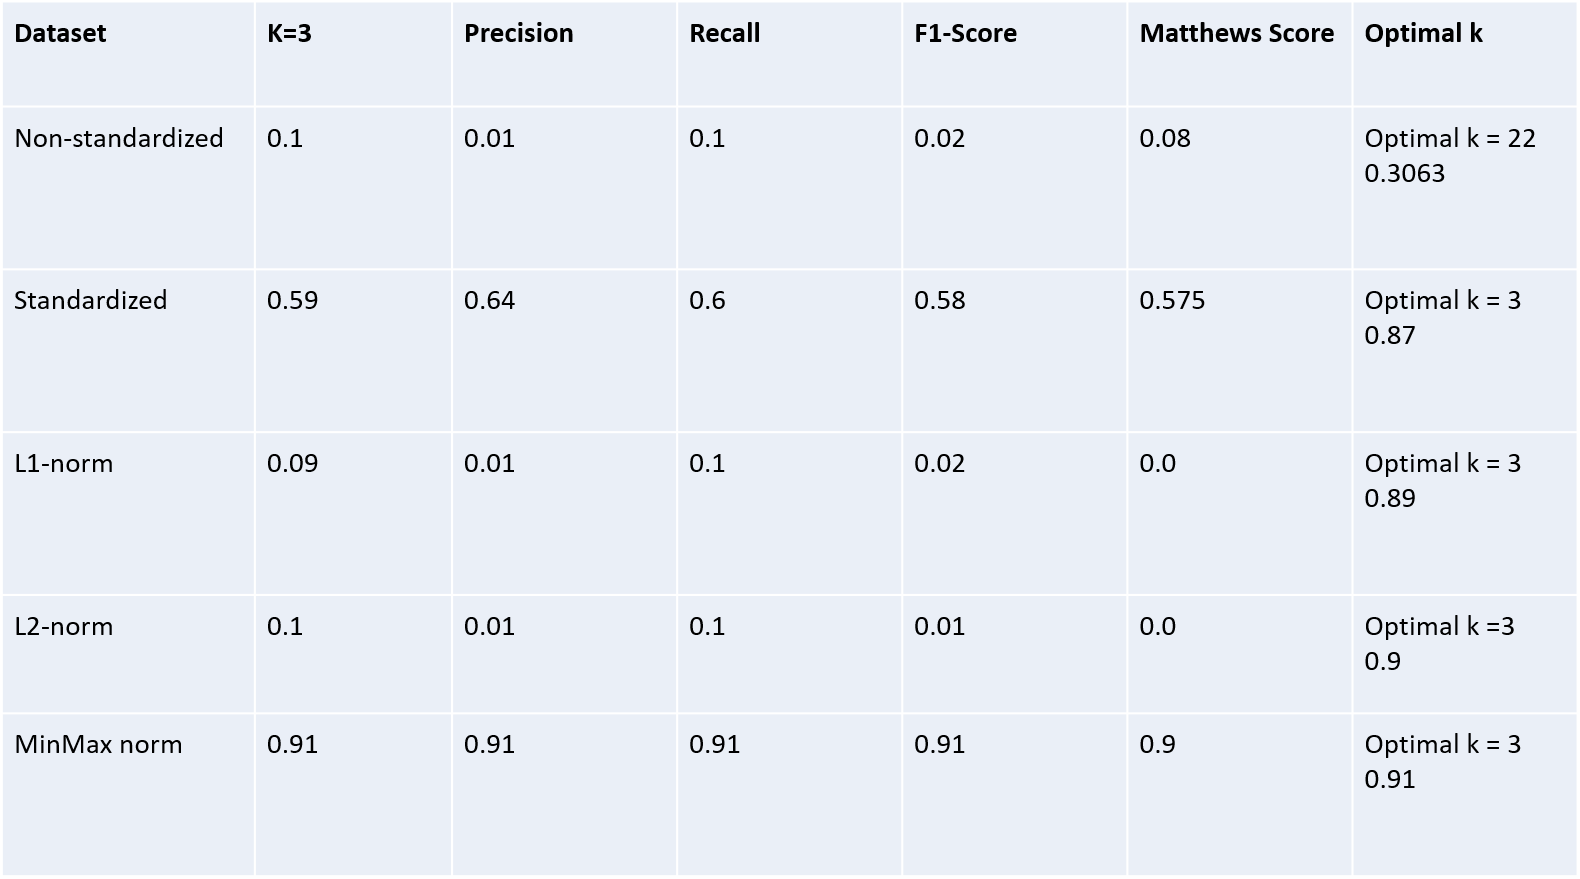

# **Random Forest Classifier**

To improve the findings and get a better classifier, another classifier - Random Forest Classifier, is used.

Random forest classifier is a non-parametric algorithm with multiple parameters that can be varied. It has around 29 different features that can be varied and set.

Multiple versions of the RF classifier with varying parameters is used to train and obtain better results.

For this particular use-case, 2 paramters are varied:
* No of estimators
  * The number of estimators is varied from 10-100 at steps of 10.
  * The number of estimators are also varied to find the optimal number. A for loop run between 10-110 wit steps of 10 is used to find the accuracy.
* Criterion i.e. the function which will measure the quality of split.
  * Three different criterions are used
    1. Gini Index
    2. Entropy
    3. Log loss

Similar to KNN, all the 5 types of normalized datasets are used.

A total of **6 models** of RF classifiers with different parameters were built.
Each of the 6 models were run against **5 datasets**. Results of which are at the end of the section.

### Random Forest Part I


*   Criterion: Gini Index
*   Estimators: 100



In [ ]:
# Random Forest - Non-standardized dataset
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
rf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset# fit function is used to train the model using the training sets as parameters
rf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_RF_ = rf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_RF_))

ACCURACY OF THE MODEL:  0.8548548548548549
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       303
           1       0.89      0.94      0.91       293
           2       0.76      0.82      0.79       302
           3       0.83      0.79      0.81       312
           4       0.92      0.87      0.89       280
           5       0.82      0.87      0.84       289
           6       0.88      0.94      0.91       318
           7       0.89      0.89      0.89       299
           8       0.82      0.86      0.84       285
           9       0.88      0.69      0.77       316

    accuracy                           0.85      2997
   macro avg       0.86      0.86      0.85      2997
weighted avg       0.86      0.85      0.85      2997



In [ ]:
# Random Forest - StandardScaler dataset
rfStandard = RandomForestClassifier(n_estimators = 100)
rfStandard.fit(X_trainStandard, y_trainStandard)
y_pred_RF_Standard = rfStandard.predict(X_testStandard)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testStandard, y_pred_RF_Standard))

ACCURACY OF THE MODEL:  0.8491825158491825


In [ ]:
# Random Forest - L1 Normalization
rfL1 = RandomForestClassifier(n_estimators = 100)
rfL1.fit(X_trainL1, y_trainL1)
y_pred_RF_L1 = rfL1.predict(X_testL1)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testL1, y_pred_RF_L1))

ACCURACY OF THE MODEL:  0.8575241908575242


In [ ]:
# Random Forest - L2 Normalization
rfL2 = RandomForestClassifier(n_estimators = 100)
rfL2.fit(X_trainL2, y_trainL2)
y_pred_RF_L2 = rfL2.predict(X_testL2)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testL2, y_pred_RF_L2))

ACCURACY OF THE MODEL:  0.8591925258591925


In [ ]:
# Random Forest
rfMax = RandomForestClassifier(n_estimators = 100)
rfMax.fit(X_trainMax, y_trainMax)
y_pred_RF_Max = rfMax.predict(X_testMax)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testMax, y_pred_RF_Max))

ACCURACY OF THE MODEL:  0.8655321988655322


In [ ]:
# Calculate Feature Importances to make Feature Selection
# model = RandomForestClassifier()
# model.fit(train.drop(columns='Class'), train.Class)

feat_imp = pd.Series(rf.feature_importances_ * 100, index=XtrainStandard.columns).sort_values(ascending=False)
feat_imp

In [ ]:
# px.bar(feat_imp.sort_values(ascending=True), orientation='h')
# ax.barh(feat_imp, xerr=error, align='center')

### Random Forest - Part II


*   Criterion: Entropy
*   Estimators: 100



In [ ]:
# Random Forest - Non-standardized Dataset
rfEntropy = RandomForestClassifier(n_estimators = 100,criterion='entropy')
rfEntropy.fit(X_train, y_train)
y_pred_RF_Entropy = rfEntropy.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_RF_Entropy))

ACCURACY OF THE MODEL:  0.8651985318651986


In [ ]:
# Random Forest - StandardScaler Dataset
rfStandardEntropy = RandomForestClassifier(n_estimators = 100,criterion='entropy')
rfStandardEntropy.fit(X_trainStandard, y_trainStandard)
y_pred_RF_StandardEntropy = rfStandardEntropy.predict(X_testStandard)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testStandard, y_pred_RF_StandardEntropy))

ACCURACY OF THE MODEL:  0.8521855188521855


In [ ]:
# Random Forest - L1 Normalization
rfL1Entropy = RandomForestClassifier(n_estimators = 100,criterion='entropy')
rfL1Entropy.fit(X_trainL1, y_trainL1)
y_pred_RF_L1Entropy = rfL1Entropy.predict(X_testL1)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testL1, y_pred_RF_L1Entropy))

ACCURACY OF THE MODEL:  0.8555221888555222


In [ ]:
# Random Forest - L2 Normalization
rfL2Entropy = RandomForestClassifier(n_estimators = 100,criterion='entropy')
rfL2Entropy.fit(X_trainL2, y_trainL2)
y_pred_RF_L2Entropy = rfL2Entropy.predict(X_testL2)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testL2, y_pred_RF_L2Entropy))

ACCURACY OF THE MODEL:  0.8621955288621955


In [ ]:
# Random Forest - - Max Normalization
rfMaxEntropy = RandomForestClassifier(n_estimators = 100,criterion='entropy')
rfMax.fit(X_trainMax, y_trainMax)
y_pred_RF_MaxEntropy = rfMax.predict(X_testMax)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testMax, y_pred_RF_MaxEntropy))

ACCURACY OF THE MODEL:  0.8705372038705372


### Random Forest Part III

*   Criterion: Log Loss
*   Estimators: 100

In [ ]:
# Random Forest - Non-standardized Dataset
rfLogLoss = RandomForestClassifier(n_estimators = 100,criterion='log_loss')
rfLogLoss.fit(X_train, y_train)
y_pred_RF_LogLoss = rfLogLoss.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_RF_LogLoss))

ACCURACY OF THE MODEL:  0.8635301968635302


In [ ]:
# Random Forest
rfStandardLogLoss = RandomForestClassifier(n_estimators = 100,criterion='log_loss')
rfStandardLogLoss.fit(X_trainStandard, y_trainStandard)
y_pred_RF_StandardLogLoss = rfStandardLogLoss.predict(X_testStandard)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testStandard, y_pred_RF_StandardLogLoss))

ACCURACY OF THE MODEL:  0.8588588588588588


In [ ]:
# Random Forest
rfL1LogLoss = RandomForestClassifier(n_estimators = 100,criterion='log_loss')
rfL1LogLoss.fit(X_trainL1, y_trainL1)
y_pred_RF_L1LogLoss = rfL1LogLoss.predict(X_testL1)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testL1, y_pred_RF_L1LogLoss))

ACCURACY OF THE MODEL:  0.8548548548548549


In [ ]:
# Random Forest
rfL2LogLoss = RandomForestClassifier(n_estimators = 100,criterion='log_loss')
rfL2LogLoss.fit(X_trainL2, y_trainL2)
y_pred_RF_L2LogLoss = rfL2LogLoss.predict(X_testL2)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testL2, y_pred_RF_L2LogLoss))

ACCURACY OF THE MODEL:  0.8591925258591925


In [ ]:
# Random Forest
rfMaxLogLoss = RandomForestClassifier(n_estimators = 100,criterion='log_loss')
rfMaxLogLoss.fit(X_trainMax, y_trainMax)
y_pred_RF_MaxLogLoss = rfMaxLogLoss.predict(X_testMax)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_testMax, y_pred_RF_MaxLogLoss))

ACCURACY OF THE MODEL:  0.8605271938605272


### Random Forest Part IV a


*   Criterion: Gini
*   Estimators: Varied between 1-100




In [ ]:
for i in range(10,110,10):
  rfEstimators = RandomForestClassifier(n_estimators=i)
  rfEstimators.fit(X_train, y_train)
  y_pred_RF_Estimators = rfEstimators.predict(X_test)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_test, y_pred_RF_Estimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7640974307640974
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8131464798131465
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8281614948281615
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8425091758425092
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8501835168501836
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8561895228561895
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8501835168501836
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8571905238571905
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8548548548548549
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8565231898565232


In [ ]:
for i in range(10,110,10):
  rfStandardEstimators = RandomForestClassifier(n_estimators=i)
  rfStandardEstimators.fit(X_trainStandard, y_trainStandard)
  y_pred_RF_StandardEstimators = rfStandardEstimators.predict(X_testStandard)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testStandard, y_pred_RF_StandardEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7681014347681014
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8098098098098098
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8234901568234901
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8321654988321655
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8471805138471805
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8445111778445111
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8485151818485152
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8491825158491825
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8525191858525192
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8541875208541875


In [ ]:
for i in range(10,110,10):
  rfL1Estimators = RandomForestClassifier(n_estimators=i)
  rfL1Estimators.fit(X_trainL1, y_trainL1)
  y_pred_RF_L1Estimators = rfL1Estimators.predict(X_testL1)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testL1, y_pred_RF_L1Estimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7547547547547547
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8058058058058059
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8274941608274942
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8391725058391725
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8391725058391725
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8451785118451786
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8445111778445111
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8488488488488488
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8555221888555222
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8528528528528528


In [ ]:
for i in range(10,110,10):
  rfL2Estimators = RandomForestClassifier(n_estimators=i)
  rfL2Estimators.fit(X_trainL2, y_trainL2)
  y_pred_RF_L2Estimators = rfL2Estimators.predict(X_testL2)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testL2, y_pred_RF_L2Estimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7547547547547547
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8131464798131465
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8338338338338338
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8428428428428428
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8461795128461795
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8508508508508509
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8575241908575242
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8611945278611945
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8621955288621955
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8605271938605272


In [ ]:
for i in range(10,110,10):
  rfMaxEstimators = RandomForestClassifier(n_estimators=i)
  rfMaxEstimators.fit(X_trainMax, y_trainMax)
  y_pred_RF_MaxEstimators = rfMaxEstimators.predict(X_testMax)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testMax, y_pred_RF_MaxEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7590924257590924
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8158158158158159
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8435101768435102
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8408408408408409
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8505171838505172
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8561895228561895
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8561895228561895
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8598598598598599
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8641975308641975
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8605271938605272


### Random Forest Part IV b
* Criterion: Entropy
* Estimators: Varied between 1-100

In [ ]:
for i in range(10,110,10):
  rfEntropyEstimators = RandomForestClassifier(n_estimators=i,criterion='entropy')
  rfEntropyEstimators.fit(X_train, y_train)
  y_pred_RF_EntropyEstimators = rfEntropyEstimators.predict(X_test)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_test, y_pred_RF_EntropyEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7727727727727728
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8154821488154822
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8381715048381715
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8365031698365032
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8468468468468469
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8541875208541875
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8605271938605272
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8658658658658659
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8621955288621955
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8608608608608609


In [ ]:
for i in range(10,110,10):
  rfStandardEntropyEstimators = RandomForestClassifier(n_estimators=i,criterion='entropy')
  rfStandardEntropyEstimators.fit(X_trainStandard, y_trainStandard)
  y_pred_RF_StandardEntropyEstimators = rfStandardEntropyEstimators.predict(X_testStandard)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testStandard, y_pred_RF_StandardEntropyEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7630964297630964
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8114781448114782
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8365031698365032
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8351685018351686
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8438438438438438
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8445111778445111
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8535201868535202
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8621955288621955
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8518518518518519
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8601935268601936


In [ ]:
for i in range(10,110,10):
  rfL1EntropyEstimators = RandomForestClassifier(n_estimators=i,criterion='entropy')
  rfL1EntropyEstimators.fit(X_trainL1, y_trainL1)
  y_pred_RF_L1EntropyEstimators = rfL1EntropyEstimators.predict(X_testL1)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testL1, y_pred_RF_L1EntropyEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7584250917584251
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8154821488154822
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8201534868201534
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8338338338338338
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8365031698365032
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8495161828495161
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8451785118451786
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8475141808475142
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8541875208541875
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8468468468468469


In [ ]:
for i in range(10,110,10):
  rfL2EntropyEstimators = RandomForestClassifier(n_estimators=i,criterion='entropy')
  rfL2EntropyEstimators.fit(X_trainL2, y_trainL2)
  y_pred_RF_L2EntropyEstimators = rfL2EntropyEstimators.predict(X_testL2)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testL2, y_pred_RF_L2EntropyEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7784451117784451
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8128128128128128
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8314981648314982
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8408408408408409
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8588588588588588
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8578578578578578
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8605271938605272
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8628628628628628
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8575241908575242
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8601935268601936


In [ ]:
for i in range(10,110,10):
  rfMaxEntropyEstimators = RandomForestClassifier(n_estimators=i,criterion='entropy')
  rfMaxEntropyEstimators.fit(X_trainMax, y_trainMax)
  y_pred_RF_MaxEntropyEstimators = rfMaxEntropyEstimators.predict(X_testMax)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testMax, y_pred_RF_MaxEntropyEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7704371037704371
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8138138138138138
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8321654988321655
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8475141808475142
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8535201868535202
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8621955288621955
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8645311978645311
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8631965298631965
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8588588588588588
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8631965298631965


### Random Forest Part IV c
* Criterion: Log Loss
* Estimators: Varied between 1-100

In [ ]:
for i in range(10,110,10):
  rfLogLossEstimators = RandomForestClassifier(n_estimators=i,criterion='log_loss')
  rfLogLossEstimators.fit(X_train, y_train)
  y_pred_RF_LogLossEstimators = rfLogLossEstimators.predict(X_test)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_test, y_pred_RF_LogLossEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7607607607607607
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8178178178178178
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8408408408408409
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8441775108441775
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8465131798465132
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8488488488488488
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8478478478478478
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8511845178511845
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8525191858525192
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8605271938605272


In [ ]:
for i in range(10,110,10):
  rfStandardLogLossEstimators = RandomForestClassifier(n_estimators=i,criterion='log_loss')
  rfStandardLogLossEstimators.fit(X_trainStandard, y_trainStandard)
  y_pred_RF_StandardLogLossEstimators = rfStandardLogLossEstimators.predict(X_testStandard)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testStandard, y_pred_RF_StandardLogLossEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7734401067734401
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8051384718051384
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8284951618284951
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8298298298298298
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8478478478478478
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8425091758425092
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8578578578578578
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8571905238571905
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8531865198531865
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8575241908575242


In [ ]:
for i in range(10,110,10):
  rfL1LogLossEstimators = RandomForestClassifier(n_estimators=i,criterion='log_loss')
  rfL1LogLossEstimators.fit(X_trainL1, y_trainL1)
  y_pred_RF_L1LogLossEstimators = rfL1LogLossEstimators.predict(X_testL1)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testL1, y_pred_RF_L1LogLossEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7580914247580914
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8144811478144811
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8261594928261595
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8411745078411745
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8405071738405072
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8401735068401736
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8435101768435102
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8461795128461795
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8441775108441775
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8498498498498499


In [ ]:
for i in range(10,110,10):
  rfL2LogLossEstimators = RandomForestClassifier(n_estimators=i,criterion='log_loss')
  rfL2LogLossEstimators.fit(X_trainL2, y_trainL2)
  y_pred_RF_L2LogLossEstimators = rfL2LogLossEstimators.predict(X_testL2)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testL2, y_pred_RF_L2LogLossEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7671004337671005
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8108108108108109
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8378378378378378
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8478478478478478
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8491825158491825
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8535201868535202
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8611945278611945
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8588588588588588
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8571905238571905
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8545211878545211


In [ ]:
for i in range(10,110,10):
  rfMaxLogLossEstimators = RandomForestClassifier(n_estimators=i,criterion='log_loss')
  rfMaxLogLossEstimators.fit(X_trainMax, y_trainMax)
  y_pred_RF_MaxLogLossEstimators = rfMaxLogLossEstimators.predict(X_testMax)
  print("ACCURACY OF THE MODEL for N_estimators =",i,":",metrics.accuracy_score(y_testMax, y_pred_RF_MaxLogLossEstimators))

ACCURACY OF THE MODEL for N_estimators = 10 : 0.7747747747747747
ACCURACY OF THE MODEL for N_estimators = 20 : 0.8254921588254922
ACCURACY OF THE MODEL for N_estimators = 30 : 0.8411745078411745
ACCURACY OF THE MODEL for N_estimators = 40 : 0.8478478478478478
ACCURACY OF THE MODEL for N_estimators = 50 : 0.8511845178511845
ACCURACY OF THE MODEL for N_estimators = 60 : 0.8528528528528528
ACCURACY OF THE MODEL for N_estimators = 70 : 0.8641975308641975
ACCURACY OF THE MODEL for N_estimators = 80 : 0.8658658658658659
ACCURACY OF THE MODEL for N_estimators = 90 : 0.8638638638638638
ACCURACY OF THE MODEL for N_estimators = 100 : 0.8645311978645311


In [ ]:
rfEstimatorsOpt = RandomForestClassifier(n_estimators=80)
rfEstimatorsOpt.fit(X_train, y_train)
y_pred_RF_EstimatorsOpt = rfEstimatorsOpt.predict(X_test)

print ("Classification Report:\n",classification_report(y_test, y_pred_RF_EstimatorsOpt))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       303
           1       0.89      0.94      0.91       293
           2       0.79      0.82      0.81       302
           3       0.82      0.80      0.81       312
           4       0.90      0.86      0.88       280
           5       0.82      0.87      0.84       289
           6       0.87      0.94      0.90       318
           7       0.91      0.87      0.89       299
           8       0.83      0.88      0.85       285
           9       0.89      0.68      0.77       316

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



In [ ]:
rfStandardEstimatorsOpt = RandomForestClassifier(n_estimators=100)
rfStandardEstimatorsOpt.fit(X_trainStandard, y_trainStandard)
y_pred_RF_StandardEstimatorsOpt = rfStandardEstimatorsOpt.predict(X_testStandard)

print ("Classification Report:\n",classification_report(y_testStandard, y_pred_RF_StandardEstimatorsOpt))
print("Accuracy Score: ",accuracy_score(y_testStandard, y_pred_RF_StandardEstimatorsOpt))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       285
           1       0.90      0.95      0.93       297
           2       0.75      0.83      0.79       299
           3       0.83      0.79      0.81       289
           4       0.92      0.84      0.88       331
           5       0.86      0.86      0.86       306
           6       0.88      0.94      0.91       284
           7       0.87      0.89      0.88       309
           8       0.81      0.84      0.83       305
           9       0.86      0.71      0.78       292

    accuracy                           0.86      2997
   macro avg       0.86      0.86      0.86      2997
weighted avg       0.86      0.86      0.86      2997

Accuracy Score:  0.8568568568568569


In [ ]:
rfL1EstimatorsOpt = RandomForestClassifier(n_estimators=90)
rfL1EstimatorsOpt.fit(X_trainL1, y_trainL1)
y_pred_RF_L1EstimatorsOpt = rfL1EstimatorsOpt.predict(X_testL1)

print ("Classification Report:\n",classification_report(y_testL1, y_pred_RF_L1EstimatorsOpt))
print("Accuracy Score: ",accuracy_score(y_testL1, y_pred_RF_L1EstimatorsOpt))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       282
           1       0.92      0.95      0.93       281
           2       0.79      0.78      0.79       305
           3       0.77      0.84      0.81       286
           4       0.90      0.84      0.87       318
           5       0.88      0.89      0.88       324
           6       0.89      0.90      0.90       313
           7       0.88      0.87      0.88       290
           8       0.84      0.85      0.84       302
           9       0.83      0.70      0.76       296

    accuracy                           0.85      2997
   macro avg       0.85      0.86      0.85      2997
weighted avg       0.86      0.85      0.85      2997

Accuracy Score:  0.8548548548548549


In [ ]:
rfL2EstimatorsOpt = RandomForestClassifier(n_estimators=90)
rfL2EstimatorsOpt.fit(X_trainL2, y_trainL2)
y_pred_RF_L2EstimatorsOpt = rfL2EstimatorsOpt.predict(X_testL2)

print ("Classification Report:\n",classification_report(y_testL2, y_pred_RF_L2EstimatorsOpt))
print("Accuracy Score: ",accuracy_score(y_testL2, y_pred_RF_L2EstimatorsOpt))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       274
           1       0.91      0.96      0.93       312
           2       0.78      0.85      0.81       291
           3       0.85      0.81      0.83       299
           4       0.89      0.83      0.86       306
           5       0.85      0.88      0.86       294
           6       0.87      0.95      0.90       319
           7       0.93      0.89      0.91       299
           8       0.88      0.89      0.88       306
           9       0.86      0.72      0.79       297

    accuracy                           0.86      2997
   macro avg       0.87      0.86      0.86      2997
weighted avg       0.87      0.86      0.86      2997

Accuracy Score:  0.8648648648648649


In [ ]:
rfMaxEstimatorsOpt = RandomForestClassifier(n_estimators=90)
rfMaxEstimatorsOpt.fit(X_trainMax, y_trainMax)
y_pred_RF_MaxEstimatorsOpt = rfMaxEstimatorsOpt.predict(X_testMax)

print ("Classification Report:\n",classification_report(y_testMax, y_pred_RF_MaxEstimatorsOpt))
print("Accuracy Score: ",accuracy_score(y_testMax, y_pred_RF_MaxEstimatorsOpt))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       334
           1       0.92      0.96      0.94       305
           2       0.78      0.83      0.80       290
           3       0.81      0.88      0.84       282
           4       0.92      0.85      0.88       298
           5       0.84      0.88      0.86       307
           6       0.90      0.91      0.91       282
           7       0.90      0.88      0.89       299
           8       0.85      0.88      0.87       298
           9       0.85      0.72      0.78       302

    accuracy                           0.87      2997
   macro avg       0.87      0.87      0.87      2997
weighted avg       0.87      0.87      0.87      2997

Accuracy Score:  0.8658658658658659


In [ ]:
data.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [ ]:
cols = list(data.columns)
cols.pop()

['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']


In [ ]:
feature_imp = pd.Series(rf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

perceptr_var               0.054707
rms_var                    0.035656
spectral_bandwidth_mean    0.034675
chroma_stft_mean           0.033559
mfcc4_mean                 0.031117
mfcc1_mean                 0.028096
rms_mean                   0.027698
harmony_var                0.027248
perceptr_mean              0.026496
spectral_centroid_mean     0.025503
rolloff_mean               0.024362
mfcc1_var                  0.023735
mfcc9_mean                 0.022511
rolloff_var                0.022399
spectral_centroid_var      0.020972
mfcc6_mean                 0.020659
harmony_mean               0.020491
mfcc3_mean                 0.020028
mfcc8_mean                 0.019309
mfcc5_var                  0.018859
zero_crossing_rate_mean    0.018759
mfcc3_var                  0.018695
chroma_stft_var            0.018207
mfcc4_var                  0.017764
mfcc11_mean                0.016587
mfcc12_mean                0.016389
mfcc7_mean                 0.016244
mfcc2_mean                 0

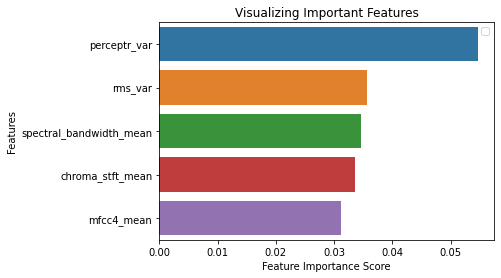

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[0:5], y=feature_imp.index[0:5])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Results:

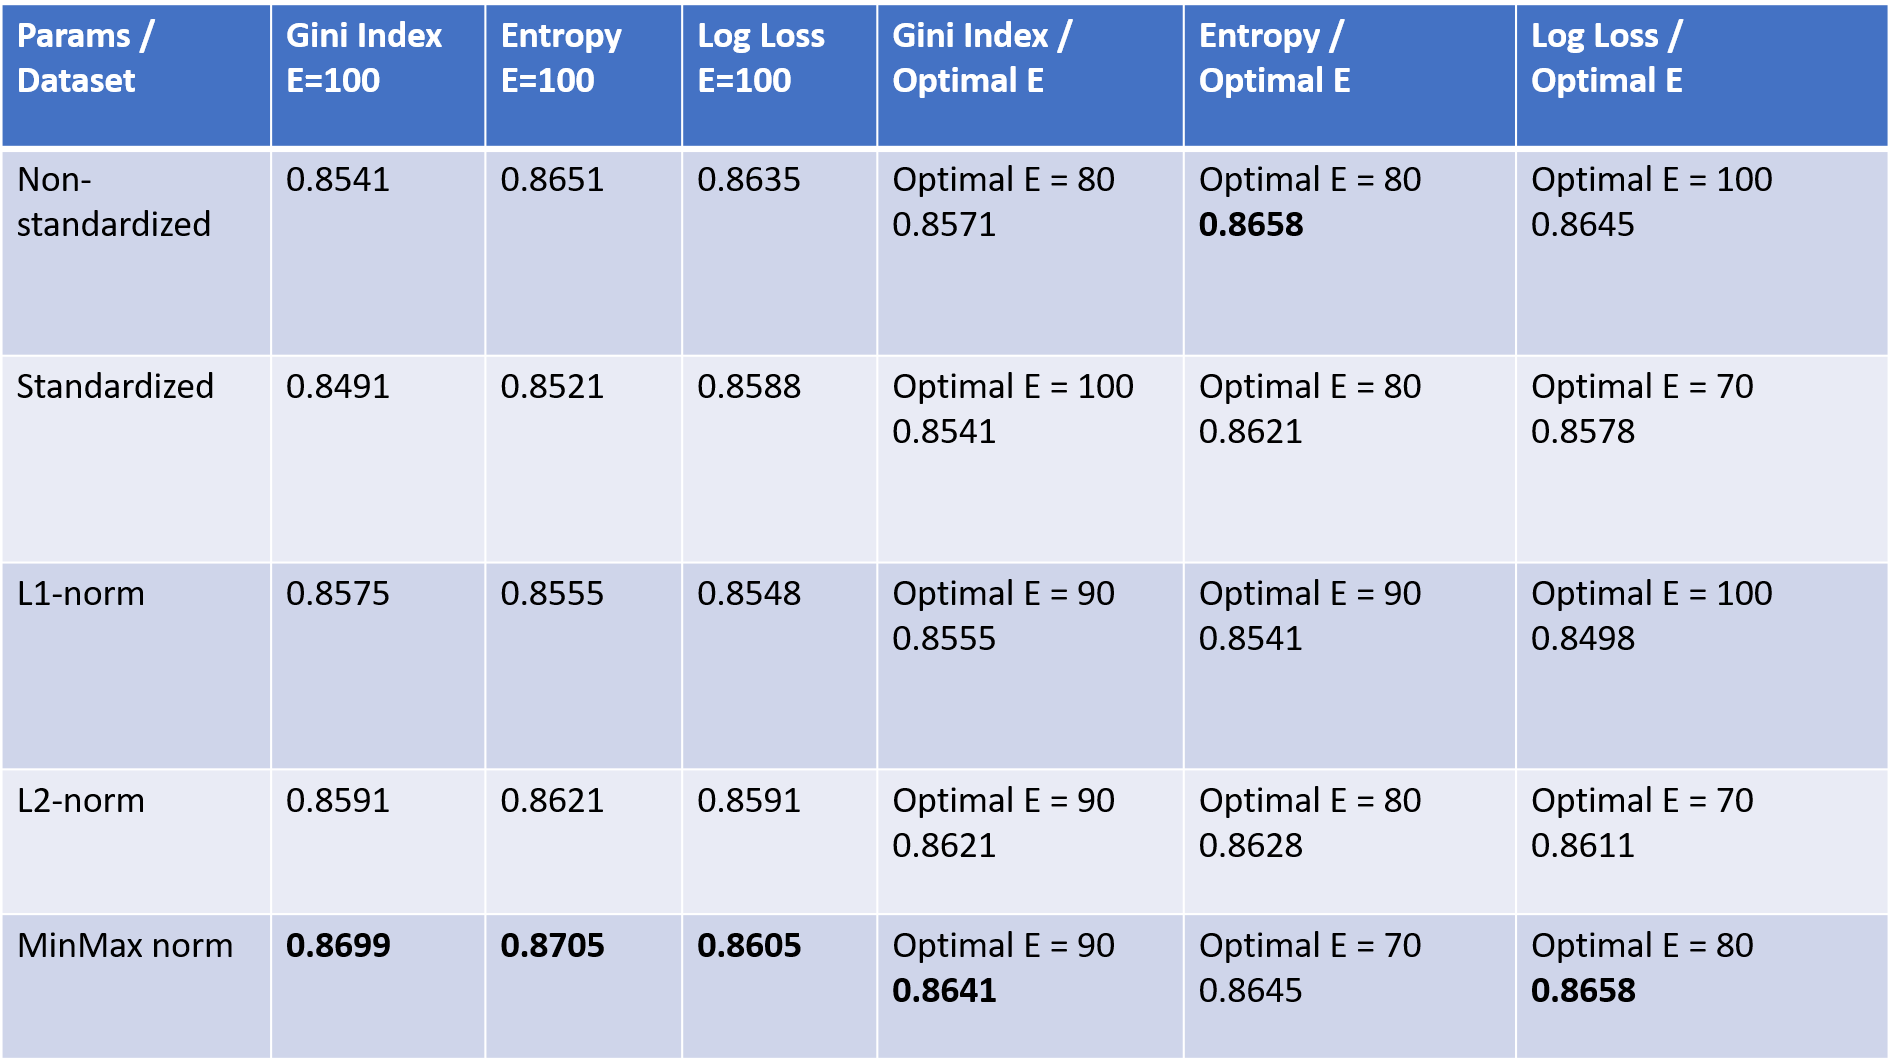

As seen in the table abve, the minmax standardized dataset returned the best results in all cases. The best accuracy of **86.58%** was obtained for the minmax normalized dataset with **no of estimators = 80** and when the **criterion = Log loss**.

Another observation to be made is that irrespective of the standardization, the results obtained for all 5 datasets were very similar. This is because Random Forest doesn't require data to be normalized and works well with a range of data. This can be specially useful when we have features that belong to different scales.

# **Artificial Neural Networks**

A neural network is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain. It creates an adaptive system that computers use to learn from their mistakes and improve continuously. Thus, artificial neural networks attempt to solve complicated problems, like summarizing documents or recognizing faces, with greater accuracy.

In this project, two ANNs are created. One without dropout layers, and one with dropout layers.

The benefit of adding dropout layers is to avoid over-fitting. The dropout layer randomly "drops" or ignores neurons while training.

The difference in results can be seen between the two neural networks.

Hyper-parameters used are:
1. **Optimizer**: Adam
2. **Loss Function**: Sparse Categorical Crossentropy



## ANN Part I

In [ ]:
# Create ANN
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_trainStandard.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifier = np.argmax(model.fit(X_train,y_train,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 1s 5ms/step - loss: 21123.0059 - accuracy: 0.1737
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 3815.6624 - accuracy: 0.2045
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 3831.8135 - accuracy: 0.2164
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 2791.8210 - accuracy: 0.2198
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 3442.3667 - accuracy: 0.2162
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 3776.0444 - accuracy: 0.2232
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 3309.4744 - accuracy: 0.2185
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 2369.2061 - accuracy: 0.2349
Epoch 9/100
55/55 [==============================] - 0s 5ms/step - loss: 2956.5916 - accuracy: 0.2111
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 1603.69

In [ ]:
classifierStandard = np.argmax(model.fit(X_trainStandard,y_trainStandard,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 1s 5ms/step - loss: 1.3487 - accuracy: 0.5197
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 0.8411 - accuracy: 0.7058
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.7669
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.7991
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.5190 - accuracy: 0.8224
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.8461
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 0.4190 - accuracy: 0.8630
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 0.3822 - accuracy: 0.8769
Epoch 9/100
55/55 [==============================] - 0s 5ms/step - loss: 0.3461 - accuracy: 0.8903
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.8979
Epoch 11/

In [ ]:
classifierL1 = np.argmax(model.fit(X_trainL1,y_trainL1,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 0s 5ms/step - loss: 2.5636 - accuracy: 0.1031
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3072 - accuracy: 0.1028
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3077 - accuracy: 0.1002
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3081 - accuracy: 0.0985
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3094 - accuracy: 0.0968
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3074 - accuracy: 0.0954
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3090 - accuracy: 0.1044
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3070 - accuracy: 0.0997
Epoch 9/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3055 - accuracy: 0.1001
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3107 - accuracy: 0.0970
Epoch 11/

In [ ]:
classifierL2 = np.argmax(model.fit(X_trainL2,y_trainL2,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 0s 5ms/step - loss: 2.0840 - accuracy: 0.2630
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 1.7328 - accuracy: 0.3801
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 1.4826 - accuracy: 0.4573
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 1.3623 - accuracy: 0.5055
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 1.2880 - accuracy: 0.5267
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 1.2372 - accuracy: 0.5421
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 1.1931 - accuracy: 0.5666
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 1.1584 - accuracy: 0.5784
Epoch 9/100
55/55 [==============================] - 0s 4ms/step - loss: 1.1261 - accuracy: 0.6007
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 1.1018 - accuracy: 0.6066
Epoch 11/

In [ ]:
classifierMax = np.argmax(model.fit(X_trainMax,y_trainMax,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 0s 5ms/step - loss: 11.0333 - accuracy: 0.5647
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 1.2238 - accuracy: 0.6857
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 0.8999 - accuracy: 0.7199
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 0.7820 - accuracy: 0.7485
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.7030 - accuracy: 0.7671
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.7902
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 0.5971 - accuracy: 0.7982
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.8137
Epoch 9/100
55/55 [==============================] - 0s 4ms/step - loss: 0.5217 - accuracy: 0.8283
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.8333
Epoch 11

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

#Validating our approach¶
x_val = X_train
partial_x_train = X_train

y_val = y_train
partial_y_train = y_train

94/94 [==============================] - 0s 2ms/step - loss: 7658286.5000 - accuracy: 0.1024
test_acc:  0.10243576765060425


In [ ]:
test_lossStandard, test_accStandard = model.evaluate(X_testStandard,y_testStandard)
print('test_acc: ',test_accStandard)

#Validating our approach¶
x_val = X_trainStandard
partial_x_train = X_trainStandard

y_val = y_trainStandard
partial_y_train = y_trainStandard

94/94 [==============================] - 0s 2ms/step - loss: 76.6341 - accuracy: 0.5506
test_acc:  0.5505505800247192


In [ ]:
test_lossL1, test_accL1 = model.evaluate(X_testL1,y_testL1)
print('test_acc: ',test_accL1)

#Validating our approach¶
x_val = X_trainL1
partial_x_train = X_trainL1

y_val = y_trainL1
partial_y_train = y_trainL1

94/94 [==============================] - 0s 2ms/step - loss: 7.7861 - accuracy: 0.0951
test_acc:  0.09509509801864624


In [ ]:
test_lossL2, test_accL2 = model.evaluate(X_testL2,y_testL2)
print('test_acc: ',test_accL2)

#Validating our approach¶
x_val = X_trainL2
partial_x_train = X_trainL2

y_val = y_trainL2
partial_y_train = y_trainL2

94/94 [==============================] - 0s 2ms/step - loss: 6.4207 - accuracy: 0.2396
test_acc:  0.2395729124546051


In [ ]:
test_lossMax, test_accMax = model.evaluate(X_testMax,y_testMax)
print('test_acc: ',test_accMax)

#Validating our approach¶
x_val = X_trainMax
partial_x_train = X_trainMax

y_val = y_trainMax
partial_y_train = y_trainMax

94/94 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.8849
test_acc:  0.8848848938941956


# ANN Part II
The above neural network showed some good results, but the test accuracy dropped showing hints of overfitting. Hence, it was decided to add dropout layers to get a more generalised model and hope for better results on the test dataset.

In [8]:
# Create ANN
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_trainStandard.shape[1],)))
model.add(layers.Dropout(.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifierDP = np.argmax(model.fit(X_train,y_train,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 1s 6ms/step - loss: 36936.9922 - accuracy: 0.1075
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 2107.3083 - accuracy: 0.0977
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 151.3832 - accuracy: 0.0907
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 69.4059 - accuracy: 0.0897
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 47.2471 - accuracy: 0.0901
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 41.7743 - accuracy: 0.1005
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 16.0862 - accuracy: 0.1075
Epoch 8/100
55/55 [==============================] - 0s 6ms/step - loss: 14.2037 - accuracy: 0.1061
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 7.3520 - accuracy: 0.1032
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 7.9756 - accuracy: 0.

In [ ]:
classifierDPStandard = np.argmax(model.fit(X_trainStandard,y_trainStandard,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 1s 6ms/step - loss: 1.9987 - accuracy: 0.2555
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 1.5704 - accuracy: 0.4489
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 1.3626 - accuracy: 0.5290
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 1.2366 - accuracy: 0.5796
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 1.1703 - accuracy: 0.6000
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 1.1256 - accuracy: 0.6321
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 1.0804 - accuracy: 0.6399
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 1.0463 - accuracy: 0.6494
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 1.0095 - accuracy: 0.6662
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 0.9819 - accuracy: 0.6717
Epoch 11/

In [ ]:
classifierDPL1 = np.argmax(model.fit(X_trainL1,y_trainL1,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 0s 5ms/step - loss: 2.8151 - accuracy: 0.0991
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3972 - accuracy: 0.1011
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3697 - accuracy: 0.0987
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3561 - accuracy: 0.0972
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3543 - accuracy: 0.0957
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3433 - accuracy: 0.1020
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3365 - accuracy: 0.0994
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3374 - accuracy: 0.0950
Epoch 9/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3317 - accuracy: 0.0977
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3277 - accuracy: 0.0985
Epoch 11/

In [ ]:
classifierDPL2 = np.argmax(model.fit(X_trainL2,y_trainL2,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3032 - accuracy: 0.0978
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3031 - accuracy: 0.0955
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3027 - accuracy: 0.1040
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3029 - accuracy: 0.0978
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1017
Epoch 8/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3025 - accuracy: 0.1038
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.1020
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3023 - accuracy: 0.1021
Epoch 11/

In [ ]:
classifierDPMax = np.argmax(model.fit(X_trainMax,y_trainMax,epochs=100,batch_size=128),axis=-1)

Epoch 1/100
55/55 [==============================] - 0s 6ms/step - loss: 2.6501 - accuracy: 0.3596
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 1.4029 - accuracy: 0.4979
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 1.1905 - accuracy: 0.5822
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 1.0932 - accuracy: 0.6273
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 1.0231 - accuracy: 0.6462
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 0.9781 - accuracy: 0.6648
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 0.9251 - accuracy: 0.6904
Epoch 8/100
55/55 [==============================] - 0s 6ms/step - loss: 0.8903 - accuracy: 0.6986
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 0.8486 - accuracy: 0.7124
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 0.8151 - accuracy: 0.7247
Epoch 11/

In [ ]:
test_lossDP, test_accDP = model.evaluate(X_test,y_test)
print('test_acc: ',test_accDP)

#Validating our approach¶
x_valDP = X_train
partial_x_trainDP = X_train

y_valDP = y_train
partial_y_trainDP = y_train

94/94 [==============================] - 0s 2ms/step - loss: 657168.1875 - accuracy: 0.1185
test_acc:  0.11845178157091141


In [ ]:
test_lossDPStandard, test_accDPStandard = model.evaluate(X_testStandard,y_testStandard)
print('test_acc: ',test_accDPStandard)

#Validating our approach¶
x_valDPStandard = X_trainStandard
partial_x_trainDPStandard = X_trainStandard

y_valDPStandard = y_trainStandard
partial_y_trainDPStandard = y_trainStandard

94/94 [==============================] - 0s 2ms/step - loss: 50.9404 - accuracy: 0.5055
test_acc:  0.5055055022239685


In [ ]:
test_lossDPL1, test_accDPL1 = model.evaluate(X_testL1,y_testL1)
print('test_acc: ',test_accDPL1)

#Validating our approach¶
x_valDPL1 = X_trainL1
partial_x_trainDPL1 = X_trainL1

y_valDPL1 = y_trainL1
partial_y_trainDPL1 = y_trainL1

94/94 [==============================] - 0s 2ms/step - loss: 7.2199 - accuracy: 0.0938
test_acc:  0.0937604308128357


In [ ]:
test_lossDPL2, test_accDPL2 = model.evaluate(X_testL2,y_testL2)
print('test_acc: ',test_accDPL2)

#Validating our approach¶
x_valDPL2 = X_trainL2
partial_x_trainDPL2 = X_trainL2

y_valDPL2 = y_trainL2
partial_y_trainDPL2 = y_trainL2

94/94 [==============================] - 0s 2ms/step - loss: 2.6050 - accuracy: 0.2222
test_acc:  0.2222222238779068


In [ ]:
test_lossDPMax, test_accDPMax = model.evaluate(X_testMax,y_testMax)
print('test_acc: ',test_accDPMax)

#Validating our approach¶
x_valDPMax = X_trainMax
partial_x_trainDPMax = X_trainMax

y_valDPMax = y_trainMax
partial_y_trainDPMax = y_trainMax

94/94 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8939
test_acc:  0.8938938975334167


### **Results**

The new neural network with dropout layers did show better results. A comparison of the results is shown in the below table.

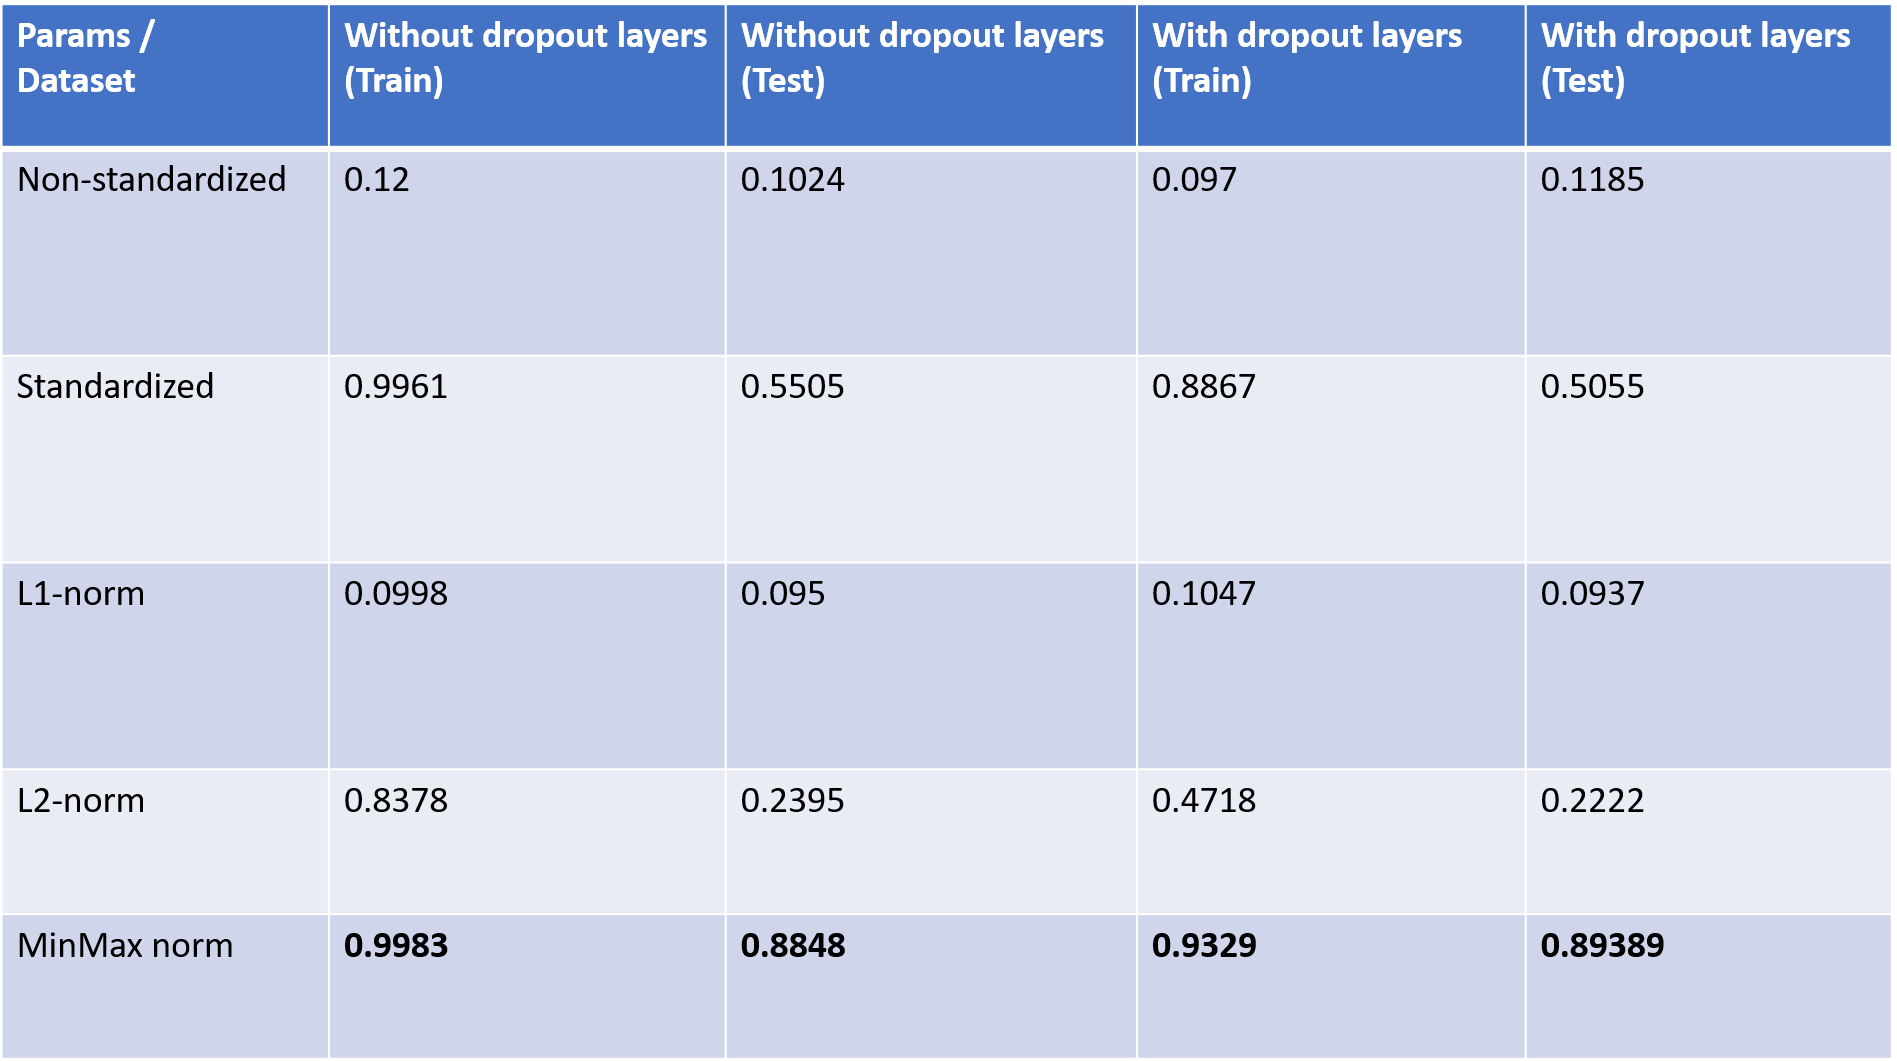

As you can see, we did get some more generalised results as compared to the first neural network without the dropout layers.
Once again, the best results were obtained for the max normalised dataset, consistent with our previous results.

# Experimental

The following section is an experiment on splitting the audio files into 3s long. We tried using the pydub library but were unsuccessful.

In [ ]:
# pip install pydub

In [ ]:
from pydub import AudioSegment
import math

class SplitWavAudioMubin():
    def __init__(self, filepath):
        self.filepath = filepath
        
        self.audio = AudioSegment.from_wav(self.filepath)
    
    def get_duration(self):
      return self.audio.duration_seconds
    
    def single_split(self, from_min, to_min, split_filename):
        t1 = from_min * 1000
        t2 = to_min * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.filepath, format="wav")
        
    def multiple_split(self, min_per_split):
        total_mins = math.ceil(self.get_duration())
        print(total_mins)
        for i in range(0, total_mins, min_per_split):
            split_fn = str(i) + '_' + self.filepath
            self.single_split(i, i+min_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_mins - min_per_split:
                print('All splited successfully')

ModuleNotFoundError: ignored

In [ ]:
audio = '/content/drive/MyDrive/ML/Final_Project/Data/genres_original/blues/blues.00000.wav'
split_wav = SplitWavAudioMubin(audio)
split_wav.multiple_split(min_per_split=3)

In [ ]:
for i, chunk in enumerate(audio[::3000]):
  with open("sound-%s.mp3" % i, "wb") as f:
    chunk.export(f, format="mp3")